<a href="https://colab.research.google.com/github/Fatemekm98/Image-Proccessing/blob/main/wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import skimage.io

In [ ]:
img=cv2.imread("/content/Car-profile-picture-57.jpg",0)

In [ ]:
print(img.shape)

(309, 550)


In [ ]:
gauss_noise=np.zeros((309,550),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

In [ ]:
gn_img=cv2.add(img,gauss_noise)

Text(0.5, 1.0, 'Combined')

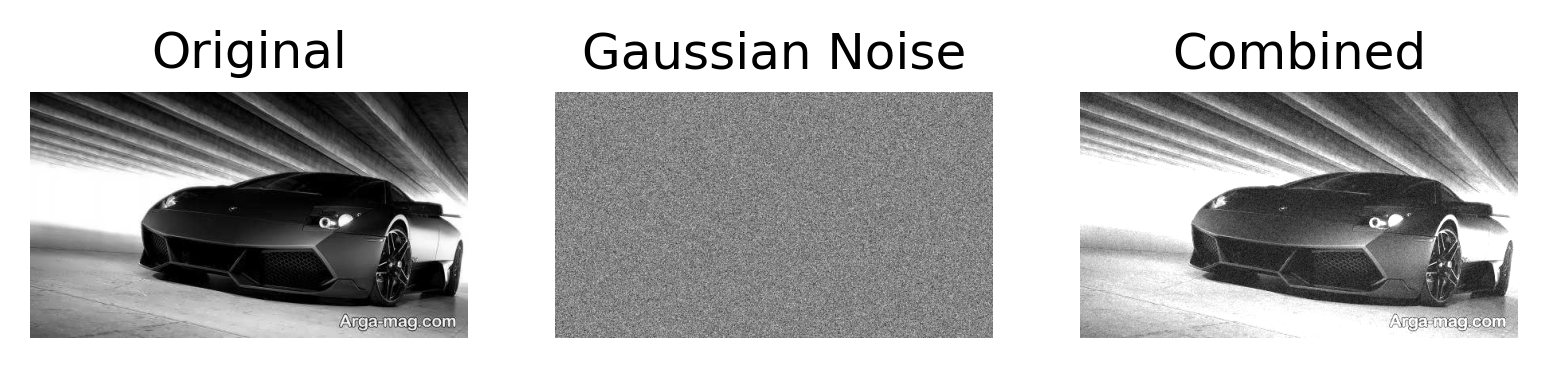

In [ ]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

In [ ]:
#denoising
img_bayes = denoise_wavelet(gn_img, method='BayesShrink', mode='soft', wavelet_levels= 4, wavelet='haar',
                           rescale_sigma=True)


img_vis = denoise_wavelet(gn_img, method='VisuShrink', mode='soft', sigma=sigma_est/3, wavelet_levels= 5, wavelet='haar',
                           rescale_sigma=True)


<ipython-input-95-fba2c1b750e4>:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_bayes = peak_signal_noise_ratio(img, img_bayes)
<ipython-input-95-fba2c1b750e4>:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_vis = peak_signal_noise_ratio(img, img_vis)


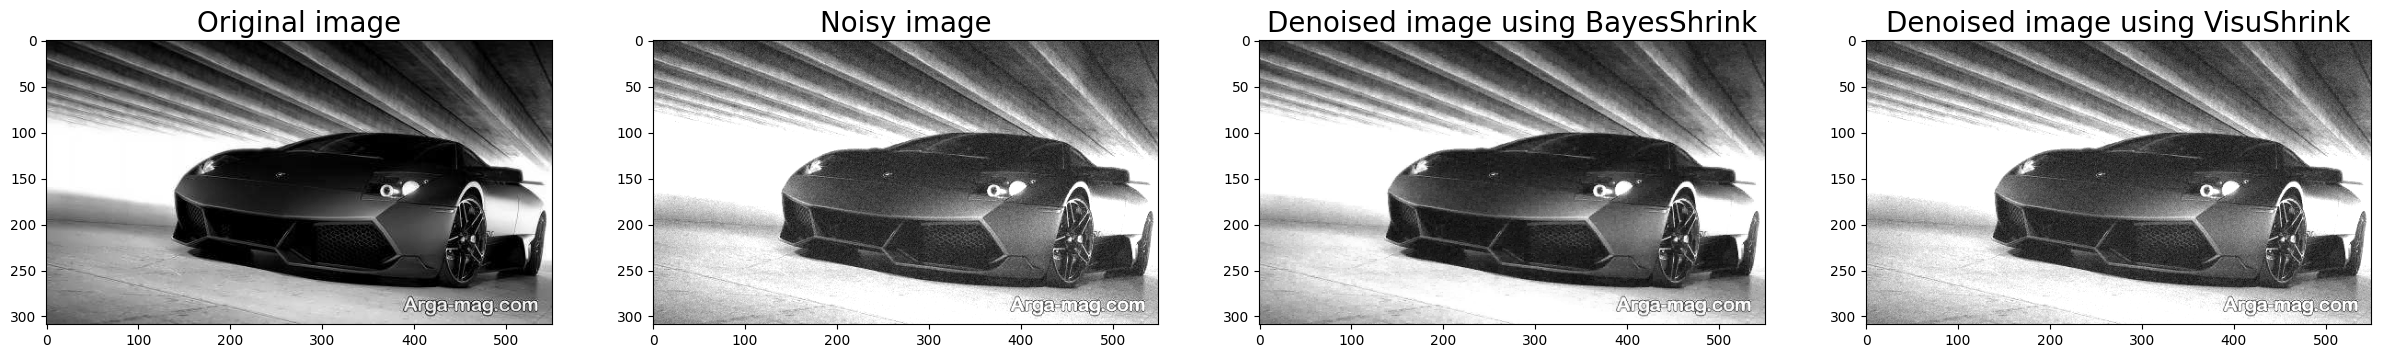

In [ ]:
#PSNR
psnr_noisy = peak_signal_noise_ratio(img, gn_img)
psnr_bayes = peak_signal_noise_ratio(img, img_bayes)
psnr_vis = peak_signal_noise_ratio(img, img_vis)

#plotting images
plt.figure(figsize=(30,100))

plt.subplot(1,4,1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image', fontsize= 20)

plt.subplot(1,4,2)
plt.imshow(gn_img, cmap=plt.cm.gray)
plt.title('Noisy image', fontsize= 20)

plt.subplot(1,4,3)
plt.imshow(img_bayes, cmap=plt.cm.gray)
plt.title('Denoised image using BayesShrink', fontsize= 20)

plt.subplot(1,4,4)
plt.imshow(img_vis, cmap=plt.cm.gray)
plt.title('Denoised image using VisuShrink', fontsize= 20)

plt.show()



In [ ]:
#print
print('PSNR[Original Vs. Noisy Image]:', psnr_noisy)
print('PSNR[Original Vs. Denoised(BayesShrink)]:', psnr_bayes)
print('PSNR[Original Vs. Denoised(VisuShrink)]:', psnr_vis)

PSNR[Original Vs. Noisy Image]: 12.573364894435795
PSNR[Original Vs. Denoised(BayesShrink)]: 5.828049868383822
PSNR[Original Vs. Denoised(VisuShrink)]: 5.828128146489692


In [ ]:
#denoising
img_bayes1 = denoise_wavelet(gn_img, method='BayesShrink', mode='hard', wavelet_levels= 4, wavelet='haar',
                           rescale_sigma=True)


img_vis1 = denoise_wavelet(gn_img, method='VisuShrink', mode='hard', sigma=sigma_est/3, wavelet_levels= 5, wavelet='haar',
                           rescale_sigma=True)


<ipython-input-102-2c9a0de17a05>:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_bayes1 = peak_signal_noise_ratio(img, img_bayes1)
<ipython-input-102-2c9a0de17a05>:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_vis1 = peak_signal_noise_ratio(img, img_vis1)


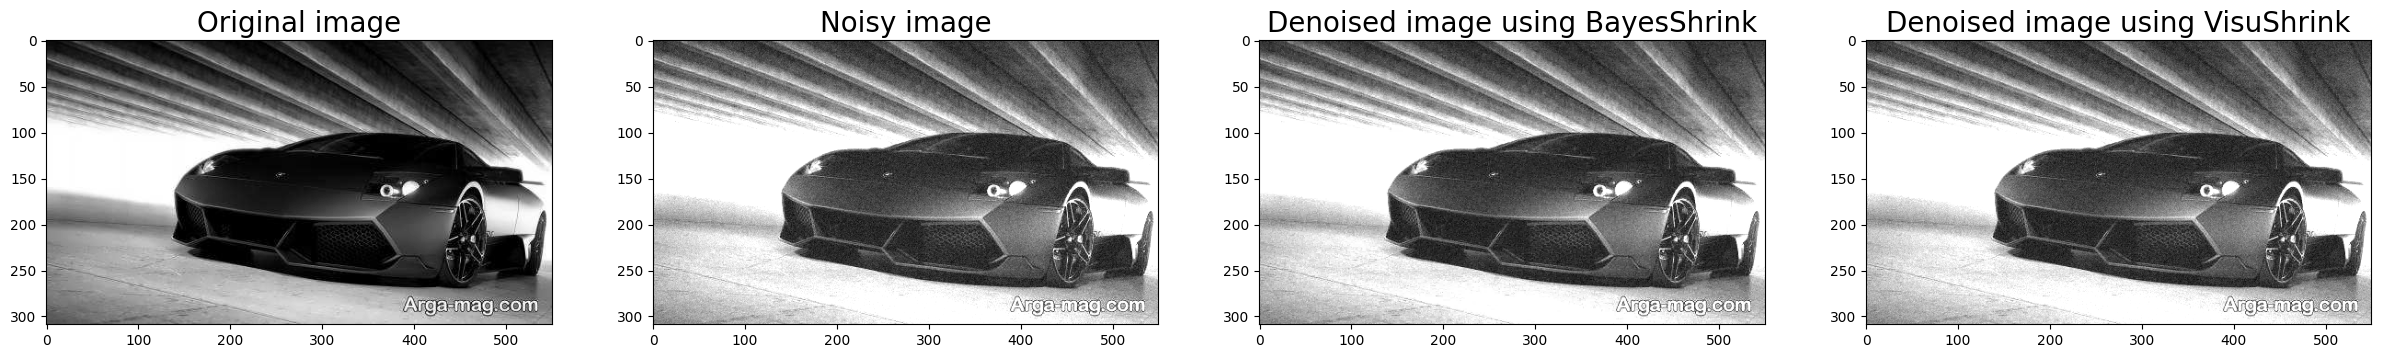

In [ ]:
#PSNR
psnr_noisy1 = peak_signal_noise_ratio(img, gn_img)
psnr_bayes1 = peak_signal_noise_ratio(img, img_bayes1)
psnr_vis1 = peak_signal_noise_ratio(img, img_vis1)

#plotting images
plt.figure(figsize=(30,100))

plt.subplot(1,4,1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image', fontsize= 20)

plt.subplot(1,4,2)
plt.imshow(gn_img, cmap=plt.cm.gray)
plt.title('Noisy image', fontsize= 20)

plt.subplot(1,4,3)
plt.imshow(img_bayes1, cmap=plt.cm.gray)
plt.title('Denoised image using BayesShrink', fontsize= 20)

plt.subplot(1,4,4)
plt.imshow(img_vis1, cmap=plt.cm.gray)
plt.title('Denoised image using VisuShrink', fontsize= 20)

plt.show()



In [ ]:
#print
print('PSNR[Original Vs. Noisy Image]:', psnr_noisy)
print('PSNR[Original Vs. Denoised(BayesShrink)]:', psnr_bayes1)
print('PSNR[Original Vs. Denoised(VisuShrink)]:', psnr_vis1)

PSNR[Original Vs. Noisy Image]: 12.573364894435795
PSNR[Original Vs. Denoised(BayesShrink)]: 5.828115634863339
PSNR[Original Vs. Denoised(VisuShrink)]: 5.828131711680305
